### Import Necessary Module and Set Path 

In [71]:
import sqlite3 as lite
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../../transition-scenarios/scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image

In [47]:
import analysis as an

In [51]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('cyclus.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [52]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

sink_source_facilities has no values
rep has no values
sink_source_facilities has no values
rep has no values


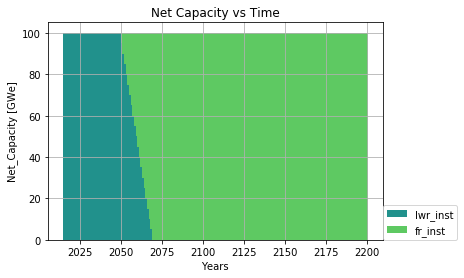

In [53]:
Image(filename='power_plot.png')

In [66]:
# Fuel Used

lwr_id = an.get_prototype_id(cur, 'lwr')
fr_driver_id = an.get_prototype_id(cur, 'fr_driver')
fr_blanket_id = an.get_prototype_id(cur, 'fr_blanket')
uox_used = an.facility_commodity_flux(cur, lwr_id, ['uox'], False, False)
driver_used = an.facility_commodity_flux(cur, fr_driver_id, ['sfr_fuel'], False, False)
blanket_used = an.facility_commodity_flux(cur, fr_blanket_id, ['sfr_U', 'uox_U'], False, False)
tot_blanket = {'blanket':[x + y for x,y in zip(blanket_used['sfr_U'], blanket_used['uox_U'])]}
total = {**uox_used, **driver_used, **tot_blanket} 

In [64]:
an.combined_line_plot(total, timestep, 'Years', 'Fuel Used [t]',
                       'Total Fuel Used', 'fuel', init_year)

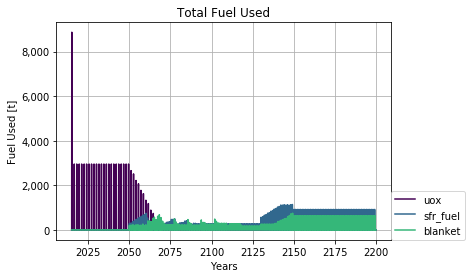

In [65]:
Image(filename='blanket_fuel.png')

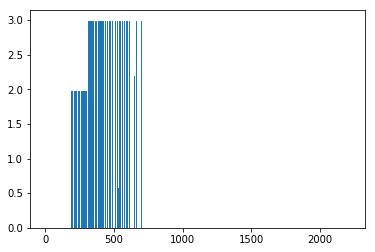

In [75]:
# discharged fuel in storage
lwr_sep = an.get_prototype_id(cur, 'uox_reprocessing_low') + an.get_prototype_id(cur, 'uox_reprocessing_high')
lwr_pu_prod = an.facility_commodity_flux(cur, lwr_sep, ['uox_Pu'], True, False)

pu_output = cur.execute('SELECT time, value FROM separationevents '
                        'WHERE Type = "uox_Pu"').fetchall()
uox_pu = an.get_timeseries(pu_output, duration, True)


plt.bar(timestep, uox_pu)
plt.show()
plt.close()
